#### 종목별 시세 파악하기  
http://marketdata.krx.co.kr/contents/MKD/04/0402/04020100/MKD04020100T3T2.jsp

In [3]:
from datetime import datetime as dt 
todate = dt.today().strftime('%Y%m%d')
fromdate = dt.today().replace(year = dt.today().year-5).strftime('%Y%m%d')

In [4]:
# STEP 1 : todate, fromdate 지정하기
from datetime import datetime as dt 
todate = dt.today().strftime('%Y%m%d')
fromdate = dt.today().replace(dt.today().year - 5).strftime('%Y%m%d')

# STEP 2 : Generate OTP 
import requests 
OTP_url = "http://marketdata.krx.co.kr/contents/COM/GenerateOTP.jspx"
OTP_data = {
    'name': 'fileDown' , 
    'filetype' : 'xls' , 
    'url' : 'MKD/04/0402/04020100/mkd04020100t3_02',
    'isu_cdnm' : 'A010950/S-Oil' ,
    'isu_cd' : 'KR7010950004' ,
    'isu_nm' : 'S-Oil' ,
    'isu_srt_cd' : 'A010950' ,
    'fromdate': fromdate , 
    'todate' : todate ,
    'pagePath' : '/contents/MKD/04/0402/04020100/MKD04020100T3T2.jsp'
}

r = requests.post(OTP_url , OTP_data)
code = r.content

# STEP 3: Download the data 
down_url = 'http://file.krx.co.kr/download.jspx'
down_data = {
    'code' : code  
}

down = requests.post(down_url , down_data)

# STEP 4 : Convert to dataframe 
import pandas as pd 
from io import BytesIO
df = pd.read_excel(BytesIO(down.content), header=0)


In [42]:
# 함수로 정리하기 
def stock_trend() : 
    # STEP 1 : todate, fromdate 지정하기
    from datetime import datetime as dt 
    todate = dt.today().strftime('%Y%m%d')
    fromdate = dt.today().replace(dt.today().year - 2).strftime('%Y%m%d')

    # STEP 2 : Generate OTP 
    import requests 
    OTP_url = "http://marketdata.krx.co.kr/contents/COM/GenerateOTP.jspx"
    OTP_data = {
        'name': 'fileDown' , 
        'filetype' : 'xls' , 
        'url' : 'MKD/04/0402/04020100/mkd04020100t3_02',
        'isu_cdnm' : 'A010950/S-Oil' ,
        'isu_cd' : 'KR7010950004' ,
        'isu_nm' : 'S-Oil' ,
        'isu_srt_cd' : 'A010950' ,
        'fromdate': fromdate , 
        'todate' : todate ,
        'pagePath' : '/contents/MKD/04/0402/04020100/MKD04020100T3T2.jsp'
    }

    r = requests.post(OTP_url , OTP_data)
    code = r.content

    # STEP 3: Download the data 
    down_url = 'http://file.krx.co.kr/download.jspx'
    down_data = {
        'code' : code  
    }

    down = requests.post(down_url , down_data)

    # STEP 4 : Convert to dataframe 
    import pandas as pd 
    from io import BytesIO
    df = pd.read_excel(BytesIO(down.content), header=0, thousands = ',',  parse_dates=['년/월/일'])
    df = df[['년/월/일' , '종가' , '시가' , '고가' , '저가' , '시가총액(백만)' , '거래량(주)']]
    df.columns = ['date' , 'closing' , 'opening' , 'high' , 'low', 'mkcap' , 'vol' ]
    return df

In [43]:
a = stock_trend()
b = a.set_index('date')

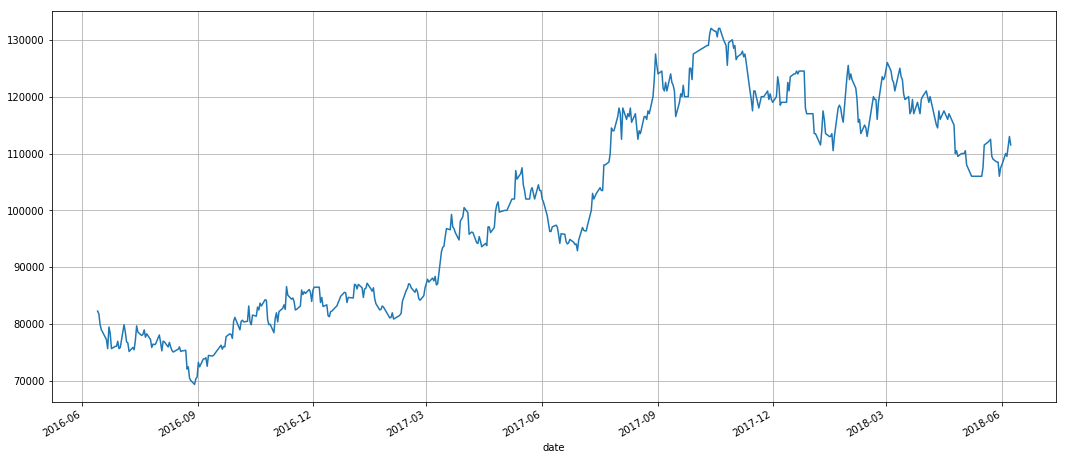

In [45]:
%matplotlib inline
b['closing'].plot(figsize=(18,8), grid=True)